In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
dataFrame = pd.read_csv("./diabetes.csv")

In [51]:
dataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
dataFrame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
y = dataFrame["Outcome"].values
x = dataFrame.drop("Outcome",axis = 1).values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(x_train)

StandardScaler()

In [74]:
x_train = scaler.transform(x_train)

In [75]:
x_test = scaler.transform(x_test)

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlp= MLPClassifier(hidden_layer_sizes=(16),activation='relu',solver='adam')

In [78]:
mlp.fit(x_train,y_train)

C:\Users\furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=16)

In [18]:
mlp?

Type:        MLPClassifier
String form: MLPClassifier(hidden_layer_sizes=16, learning_rate_init=0.0001, max_iter=1000)
File:        c:\users\furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns 

In [79]:
mlp.coefs_

[array([[ 0.49705373, -0.49620433,  0.09479979,  0.08431128, -0.34098449,
         -0.34351193,  0.44832602, -0.07217052, -0.01644863, -0.3255206 ,
          0.59492906, -0.21635636,  0.02527994,  0.42139441, -0.21604195,
          0.20616466],
        [-0.30744917, -0.62290189, -0.36742749, -0.58541461,  0.01449115,
         -0.55089421, -0.02248962, -0.20964836, -0.27382752,  0.58011197,
          0.72024806,  0.41917005, -0.1469853 , -0.20246295,  0.53325688,
         -0.26096086],
        [-0.11634016, -0.21898945, -0.08784448,  0.06343646,  0.52509413,
          0.08607488, -0.10893422,  0.2035913 , -0.15716604,  0.27880748,
         -0.64973436, -0.67523274, -0.08848028,  0.1970478 ,  0.37661121,
         -0.02363473],
        [ 0.34065374,  0.06110561,  0.25740161, -0.01276685,  0.36669828,
         -0.05455722,  0.36782297,  0.47622399,  0.2682137 , -0.31754957,
         -0.01486579,  0.31760183,  0.05194634, -0.24310254,  0.46824738,
         -0.32267666],
        [ 0.18506863

In [80]:
mlp.intercepts_

[array([-0.42124   ,  0.45210325,  0.7088837 ,  0.54850251,  0.26373523,
         0.09448797, -0.06672085,  0.18579592,  0.39803585, -0.12735495,
         0.13059441, -0.02768184,  0.04003154,  0.18527658,  0.06681741,
         0.0559577 ]),
 array([0.12035108])]

In [81]:
tahmin=mlp.predict(x_test)

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test,tahmin))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       160
           1       0.62      0.63      0.63        71

    accuracy                           0.77       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.77      0.77      0.77       231



In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

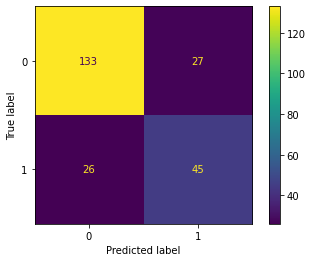

In [85]:
plot_confusion_matrix(mlp, x_test, y_test)

## Model Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [41]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or l

In [97]:
params={ "alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
        "hidden_layer_sizes":[(16),(16,16),(16,8),(16,8,8),(16,8,4),(32,32),(32,16)]}

In [98]:
mlpc = MLPClassifier(solver="adam",activation="relu")

In [99]:
mlpc_cv_model = GridSearchCV(mlpc,params,cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   37.0s finished
C:\Users\furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
mlpc_cv_model

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001],
                         'hidden_layer_sizes': [16, (16, 16), (16, 8),
                                                (16, 8, 8), (16, 8, 4),
                                                (32, 32), (32, 16)]},
             verbose=2)

In [101]:
mlpc_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (16, 8, 8)}

In [114]:
tuned_model = MLPClassifier(solver="adam",activation="relu",alpha=0.1,hidden_layer_sizes=(16)).fit(x_train,y_train)

C:\Users\furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
y_pred =tuned_model.predict(x_test)

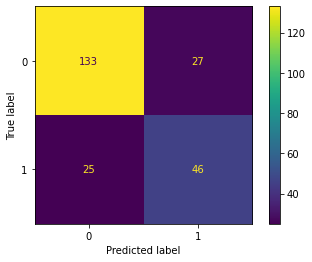

In [116]:
plot_confusion_matrix(tuned_model, x_test, y_test)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       160
           1       0.63      0.65      0.64        71

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.78      0.77      0.78       231

